### Specialized ufuncs

🌷Another excellent source for more specialized and obscure ufuncs is the submodule <b> scipy.special.

In [2]:
from scipy import special

x = [1,5, 10]
print("gamma(x)" , special.gamma(x))
print("beta(x,2)", special.beta(x, 2))

gamma(x) [1.0000e+00 2.4000e+01 3.6288e+05]
beta(x,2) [0.5        0.03333333 0.00909091]


## Advanced Ufunc Features

### Specifying output

🌻 For large calculations, it is sometimes useful to be able to specify the array where the result of the calculation will be stored. 

🌻Rather than creating a temporary array, you can use this to write computation results directly to the memory location where you’d like them to be.

In [9]:
import numpy as np
x = np.arange(5)
y = np.empty(5)
print(x)
np.multiply(x, 10, out=y)
print(y)

[0 1 2 3 4]
[ 0. 10. 20. 30. 40.]


In [12]:
y = np.zeros(10)
print(y)
np.power(2, x, out=y[::2])
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


### Aggregates

💮 For binary ufuncs, there are some interesting aggregates that can be computed
directly from the object.

In [15]:
x = np.arange(1, 6)
print(x)
np.add.reduce(x)

[1 2 3 4 5]


15

In [16]:
np.multiply.reduce(x)

120

In [17]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [18]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120], dtype=int32)

### Outer products

💐Finally, any ufunc can compute the output of all pairs of two different inputs using the outer method. 

💐This allows you, in one line, to do things like create a multiplica‐
tion table:

In [20]:
x = np.arange(1,6)
print(x)
np.multiply.outer(x,x)

[1 2 3 4 5]


array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

# Aggregations: Min, Max, and Everything in Between

<div class="alert alert-danger">🔶Often when you are faced with a large amount of data, a first step is to compute summary statistics for the data in question. 

🔶Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the “typical” values in a dataset, but other aggregates are useful as well 
(the sum, product, median,minimum and maximum, quantiles, etc.).</div>

## Summing the Values in an Array
computes the sum of all values in an array

In [23]:
L = np.random.random(100)
sum(L)

47.58693695028886

In [24]:
np.sum(L)

47.586936950288845

In [28]:
big_array = np.random.rand(100000)
print(big_array)

[0.89231956 0.45516398 0.69722948 ... 0.94117218 0.91143468 0.28219569]


In [29]:
%timeit sum(big_array)

11.8 ms ± 336 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
%timeit np.sum(big_array)

74.1 µs ± 2.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Minimum and Maximum
Used to find the minimum value and maximum value of any given array

In [31]:
min(big_array), max(big_array)

(7.462409128078384e-06, 0.9999865713658688)

In [32]:
np.min(big_array), np.max(big_array)

(7.462409128078384e-06, 0.9999865713658688)

In [33]:
%timeit min(big_array)

8.27 ms ± 468 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
%timeit np.min(big_array)

43.9 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Multidimensional aggregates
 finds aggregate along a row or column

In [35]:
M = np.random.random((3, 4))
print(M)


[[0.02152887 0.20435911 0.08402291 0.20989   ]
 [0.88478139 0.81370303 0.96163717 0.8769187 ]
 [0.06627145 0.84113298 0.11755837 0.81697319]]


In [36]:
M.sum()

5.898777171762348

In [37]:
M.sum(axis=1)#rows

array([0.51980089, 3.53704029, 1.84193599])

In [38]:
M.sum(axis=0) #coloumn

array([0.9725817 , 1.85919513, 1.16321845, 1.90378189])

## Other aggregation functions

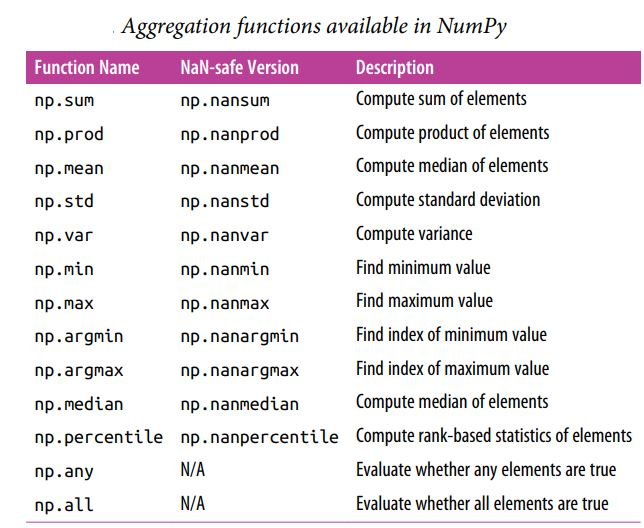


# Example: What Is the Average Height of US Presidents?

In [41]:
import pandas as pd

#Load the CSV file
data = pd.read_csv("datasets/president_heights.csv")
# Display the first five rows
print(data.head())

   order               name  height(cm)
0      1  George Washington         189
1      2         John Adams         170
2      3   Thomas Jefferson         189
3      4      James Madison         163
4      5       James Monroe         183


In [43]:
heights = np.array(data["height(cm)"])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [44]:
print("Mean Height:  ", heights.mean())
print("Std Diviation:  ", heights.std())
print("Minimum Height:  ", heights.min())
print("Maximum Height:  ", heights.max())

Mean Height:   179.73809523809524
Std Diviation:   6.931843442745892
Minimum Height:   163
Maximum Height:   193


In [45]:
print("25th percentile:  ", np.percentile(heights, 25))
print("Median:  ", np.median(heights))
print("75th percentile:  ", np.percentile(heights, 75))

25th percentile:   174.25
Median:   182.0
75th percentile:   183.0


In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #set plot style

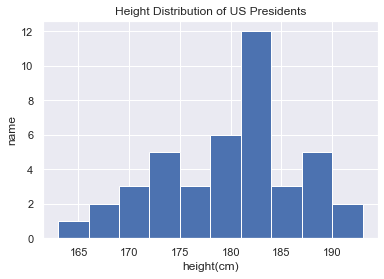

In [48]:
plt.hist(heights)
plt.title("Height Distribution of US Presidents")
plt.xlabel("height(cm)")
plt.ylabel("name");

# Example: What Is the Average Salary of Employees according to Age?